In [2]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, sys, tarfile

In [3]:
try:
    tar = tarfile.open("archive (3)/lfw-funneled.tgz", "r")
    for item in tar:
        tar.extract(item, "archive (3)/faces")
except:
    print("Error")

In [4]:
faces_list = np.array(os.listdir("archive (3)/faces/lfw_funneled"))


array(['Aaron_Eckhart', 'Aaron_Guiel', 'Aaron_Patterson', 'Aaron_Peirsol',
       'Aaron_Pena'], dtype='<U35')

In [9]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=10, resize=0.4)

In [33]:
print(lfw_people.target.shape)
print(lfw_people.images.shape)

(4324,)
(4324, 50, 37)


In [38]:
same_faces = {}

for i, name in enumerate(lfw_people.target):
    if name not in same_faces.keys():
        same_faces[name] = []
    same_faces[name].append(np.expand_dims(lfw_people.images[i], -1))

print(same_faces.keys())

dict_keys([54, 0, 134, 23, 153, 56, 137, 157, 106, 17, 37, 28, 76, 11, 92, 3, 21, 6, 81, 57, 13, 36, 35, 156, 128, 117, 131, 125, 149, 91, 59, 86, 26, 34, 65, 85, 88, 77, 138, 124, 63, 152, 70, 95, 5, 46, 25, 127, 111, 102, 42, 61, 154, 4, 14, 119, 49, 47, 68, 139, 103, 100, 151, 72, 89, 19, 66, 110, 99, 93, 146, 39, 79, 38, 29, 33, 50, 73, 12, 145, 122, 123, 45, 147, 129, 60, 41, 43, 44, 52, 83, 109, 141, 144, 24, 48, 80, 126, 30, 121, 7, 97, 40, 27, 9, 84, 120, 78, 136, 1, 67, 71, 90, 96, 132, 10, 69, 15, 8, 143, 62, 2, 118, 130, 115, 94, 82, 116, 18, 112, 114, 58, 32, 142, 64, 75, 20, 98, 87, 148, 150, 51, 74, 105, 107, 55, 104, 140, 133, 113, 31, 108, 16, 101, 155, 53, 135, 22])


In [40]:
for key in same_faces.keys():
    if len(same_faces[key]) > 1:
        print(same_faces[key][0].shape)
# print(len(same_faces["David Beckham"]))

(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50, 37, 1)
(50,

In [57]:
import math
import random

triplets = []

for key in same_faces.keys():
    images = np.array(same_faces[key])
    for i in range(int(math.ceil(len(images)/8))):
        triplet = []
        image_pair = np.random.choice(np.arange(len(images)), size = 2, replace=False)
        triplet.append(images[image_pair[0]])
        triplet.append(images[image_pair[1]])
        key_negative = random.choice(list(same_faces.keys()))
        if key_negative == key:
            key_negative = random.choice(list(same_faces.keys()))
        neg_img = random.choice(same_faces[key_negative])
        triplet.append(neg_img)
        triplet = np.array(triplet)
        triplets.append(triplet)

615


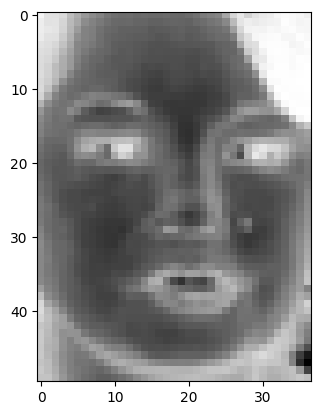

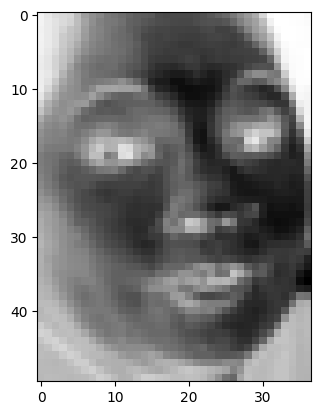

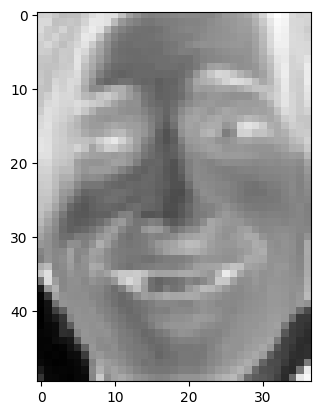

In [63]:
print(len(triplets))
for triplet in triplets[70]:
    plt.imshow(triplet, cmap=plt.cm.binary)
    plt.show()

In [56]:
print(len(same_faces[54]))

52
